# <center>ElecTweets</center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#To-Do-List" data-toc-modified-id="To-Do-List-1">To Do List</a></span></li><li><span><a href="#Import-des-Librairies" data-toc-modified-id="Import-des-Librairies-2">Import des Librairies</a></span></li><li><span><a href="#Paramètres" data-toc-modified-id="Paramètres-3">Paramètres</a></span></li><li><span><a href="#Import-du-Dataset" data-toc-modified-id="Import-du-Dataset-4">Import du Dataset</a></span></li><li><span><a href="#Exploration-et-Analyse-du-Dataset" data-toc-modified-id="Exploration-et-Analyse-du-Dataset-5">Exploration et Analyse du Dataset</a></span><ul class="toc-item"><li><span><a href="#sexe" data-toc-modified-id="sexe-5.1"><code>sexe</code></a></span></li><li><span><a href="#compte_verifie" data-toc-modified-id="compte_verifie-5.2"><code>compte_verifie</code></a></span></li><li><span><a href="#sortant" data-toc-modified-id="sortant-5.3"><code>sortant</code></a></span></li><li><span><a href="#dissident" data-toc-modified-id="dissident-5.4"><code>dissident</code></a></span></li><li><span><a href="#nb_tweets" data-toc-modified-id="nb_tweets-5.5"><code>nb_tweets</code></a></span></li><li><span><a href="#likes" data-toc-modified-id="likes-5.6"><code>likes</code></a></span></li><li><span><a href="#retweets" data-toc-modified-id="retweets-5.7"><code>retweets</code></a></span></li><li><span><a href="#resultat_election" data-toc-modified-id="resultat_election-5.8"><code>resultat_election</code></a></span></li><li><span><a href="#Analyse-des-valeurs-manquantes" data-toc-modified-id="Analyse-des-valeurs-manquantes-5.9">Analyse des valeurs manquantes</a></span></li></ul></li><li><span><a href="#Préparation-du-Dataset" data-toc-modified-id="Préparation-du-Dataset-6">Préparation du Dataset</a></span><ul class="toc-item"><li><span><a href="#Suppression-des-variables-non-pertinentes" data-toc-modified-id="Suppression-des-variables-non-pertinentes-6.1">Suppression des variables non pertinentes</a></span></li><li><span><a href="#Constitution-des-jeux-d'entraînement-et-de-test" data-toc-modified-id="Constitution-des-jeux-d'entraînement-et-de-test-6.2">Constitution des jeux d'entraînement et de test</a></span></li><li><span><a href="#Traitement-des-valeurs-manquantes" data-toc-modified-id="Traitement-des-valeurs-manquantes-6.3">Traitement des valeurs manquantes</a></span><ul class="toc-item"><li><span><a href="#Valeurs-manquantes-dans-le-jeu-d'entraînement" data-toc-modified-id="Valeurs-manquantes-dans-le-jeu-d'entraînement-6.3.1">Valeurs manquantes dans le jeu d'entraînement</a></span></li><li><span><a href="#Valeurs-manquantes-dans-le-jeu-de-test" data-toc-modified-id="Valeurs-manquantes-dans-le-jeu-de-test-6.3.2">Valeurs manquantes dans le jeu de test</a></span></li></ul></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-6.4">Feature engineering</a></span><ul class="toc-item"><li><span><a href="#Création-d'une-colonne-âge" data-toc-modified-id="Création-d'une-colonne-âge-6.4.1">Création d'une colonne <code>âge</code></a></span></li><li><span><a href="#Création-d'une-colonne-compte_twitter-booléenne" data-toc-modified-id="Création-d'une-colonne-compte_twitter-booléenne-6.4.2">Création d'une colonne <code>compte_twitter</code> booléenne</a></span></li><li><span><a href="#Création-d'une-colonne-xp_twitter" data-toc-modified-id="Création-d'une-colonne-xp_twitter-6.4.3">Création d'une colonne <code>xp_twitter</code></a></span></li></ul></li><li><span><a href="#Conversion-des-types-des-colonnes" data-toc-modified-id="Conversion-des-types-des-colonnes-6.5">Conversion des types des colonnes</a></span></li><li><span><a href="#Création-du-preprocessor" data-toc-modified-id="Création-du-preprocessor-6.6">Création du preprocessor</a></span></li><li><span><a href="#Vérification-des-jeux-finaux" data-toc-modified-id="Vérification-des-jeux-finaux-6.7">Vérification des jeux finaux</a></span></li></ul></li><li><span><a href="#Modélisation" data-toc-modified-id="Modélisation-7">Modélisation</a></span><ul class="toc-item"><li><span><a href="#Définition-des-métriques" data-toc-modified-id="Définition-des-métriques-7.1">Définition des métriques</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-7.2">Decision Tree</a></span></li></ul></li></ul></div>

## To Do List

- Compléter l'exploration du dataset avec notamment l'ajout de graphe d'analyse des variables agrégées (histogrammes?)
- Tester d'autres modèles
- Pousser l'analyse des résultats (ajout d'une courbe ROC?)

Faites vous plaiz!

## Import des Librairies

In [2]:
import warnings
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime, date
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier

## Paramètres

In [3]:
pp = pprint.PrettyPrinter(indent=4)

sns.set_theme(style="whitegrid")
sns.color_palette()

pd.set_option("display.max_rows",150)
pd.set_option('display.max_columns', None)

## Import du Dataset

In [4]:
dates = [
    "date_naissance",
    "date_creation_compte",
    "date_premier_tour"
]

df = pd.read_csv('data/dataframe_to_use.csv', sep=";", parse_dates=dates)

## Exploration et Analyse du Dataset

In [5]:
df.head()

,id_candidat,prenom,nom,sexe,date_naissance,id_twitter,compte_verifie,date_creation_compte,annee_election,date_premier_tour,nom_annee_election,nom_derniere_election,sortant,dissident,parti_vainqueur_presidentielles,resultat_election,nb_tweets_elec_period,nb_tweets_reserve_period,nb_tweets_last_week,nb_tweets_1st_concern,nb_tweets_2nd_concern,nb_tweets_3rd_concern,sum_likes_elec_period,max_likes_elec_period,avg_likes_elec_period,sum_likes_reserve_period,max_likes_reserve_period,avg_likes_reserve_period,sum_likes_last_week,max_likes_last_week,avg_likes_last_week,sum_likes_1st_concern,max_likes_1st_concern,avg_likes_1st_concern,sum_likes_2nd_concern,max_likes_2nd_concern,avg_likes_2nd_concern,sum_likes_3rd_concern,max_likes_3rd_concern,avg_likes_3rd_concern,sum_retweets_elec_period,max_retweets_elec_period,avg_retweets_elec_period,sum_retweets_reserve_period,max_retweets_reserve_period,avg_retweets_reserve_period,sum_retweets_last_week,max_retweets_last_week,avg_retweets_last_week,sum_retweets_1st_concern,max_retweets_1st_concern,avg_retweets_1st_concern,sum_retweets_2nd_concern,max_retweets_2nd_concern,avg_retweets_2nd_concern,sum_retweets_3rd_concern,max_retweets_3rd_concern,avg_retweets_3rd_concern
0,1,Sandrine,Adobati,F,1974-03-30,NaN,NaN,NaT,2022,2022-06-12,DIV,DIV,False,False,LREM,False,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
1,2,Marie-Josee,Boulaire,F,1959-01-26,1.130170e+18,False,2019-05-01,2022,2022-06-12,RN,RN,False,False,LREM,False,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
2,3,Arnaud,Charvillat,M,1977-10-28,NaN,NaN,NaT,2022,2022-06-12,DXG,DXG,False,False,LREM,False,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
3,4,Fran�ois-Marie,Didier,M,1980-10-03,1.207402e+18,False,2019-12-01,2022,2022-06-12,LR,LR,False,False,LREM,False,68,46,17,1,0,1,1910,291.0,28.0,1186,291.0,26.0,405,55.0,24.0,44,44.0,44.0,0,0.0,0.0,7,7.0,7.0,10679,8223.0,157.0,10352,8223.0,225.0,1574,962.0,93.0,27,27.0,27.0,0,0.0,0.0,0,0.0,0.0
4,5,Lamia,El Aaraje,F,1986-11-22,9.436728e+08,True,2012-11-01,2022,2022-06-12,NUPES,NUPES,True,True,LREM,False,466,274,115,1,2,0,12458,1809.0,27.0,7103,1809.0,26.0,1749,216.0,15.0,27,27.0,27.0,153,101.0,77.0,0,0.0,0.0,24056,6671.0,52.0,18437,6671.0,67.0,4103,1306.0,36.0,15,15.0,15.0,73,43.0,37.0,0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 58 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id_candidat                      189 non-null    int64         
 1   prenom                           189 non-null    object        
 2   nom                              189 non-null    object        
 3   sexe                             189 non-null    object        
 4   date_naissance                   189 non-null    datetime64[ns]
 5   id_twitter                       98 non-null     float64       
 6   compte_verifie                   97 non-null     object        
 7   date_creation_compte             99 non-null     datetime64[ns]
 8   annee_election                   189 non-null    int64         
 9   date_premier_tour                189 non-null    datetime64[ns]
 10  nom_annee_election               189 non-null    object       

### `sexe`

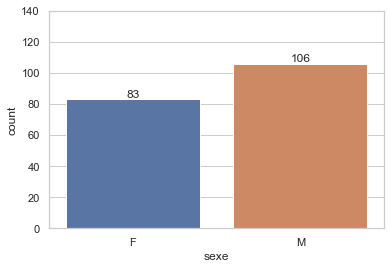

In [7]:
ax = sns.countplot(x="sexe", data=df)
ax.bar_label(ax.containers[0])
ax.set_ylim([0, 140])
plt.show()

### `compte_verifie`

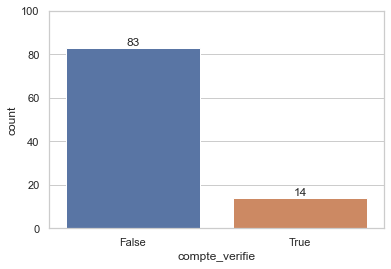

In [8]:
ax = sns.countplot(x="compte_verifie", data=df)
ax.bar_label(ax.containers[0])
ax.set_ylim([0, 100])
plt.show()

### `sortant`

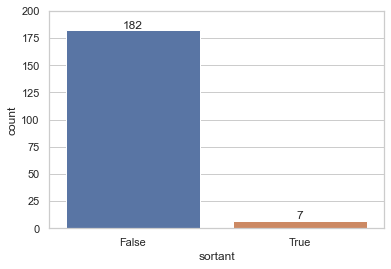

In [9]:
ax = sns.countplot(x="sortant", data=df)
ax.bar_label(ax.containers[0])
ax.set_ylim([0, 200])
plt.show()

### `dissident`

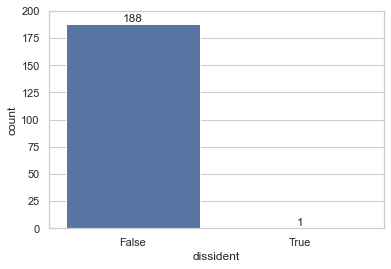

In [10]:
ax = sns.countplot(x="dissident", data=df)
ax.bar_label(ax.containers[0])
ax.set_ylim([0, 200])
plt.show()

### `nb_tweets`

### `likes`

### `retweets`

### `resultat_election`

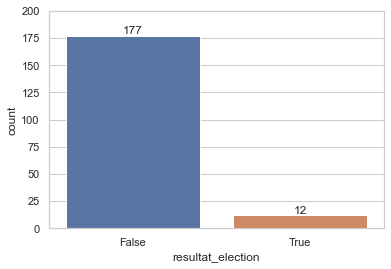

In [11]:
ax = sns.countplot(x="resultat_election", data=df)
ax.bar_label(ax.containers[0])
ax.set_ylim([0, 200])
plt.show()

### Analyse des valeurs manquantes

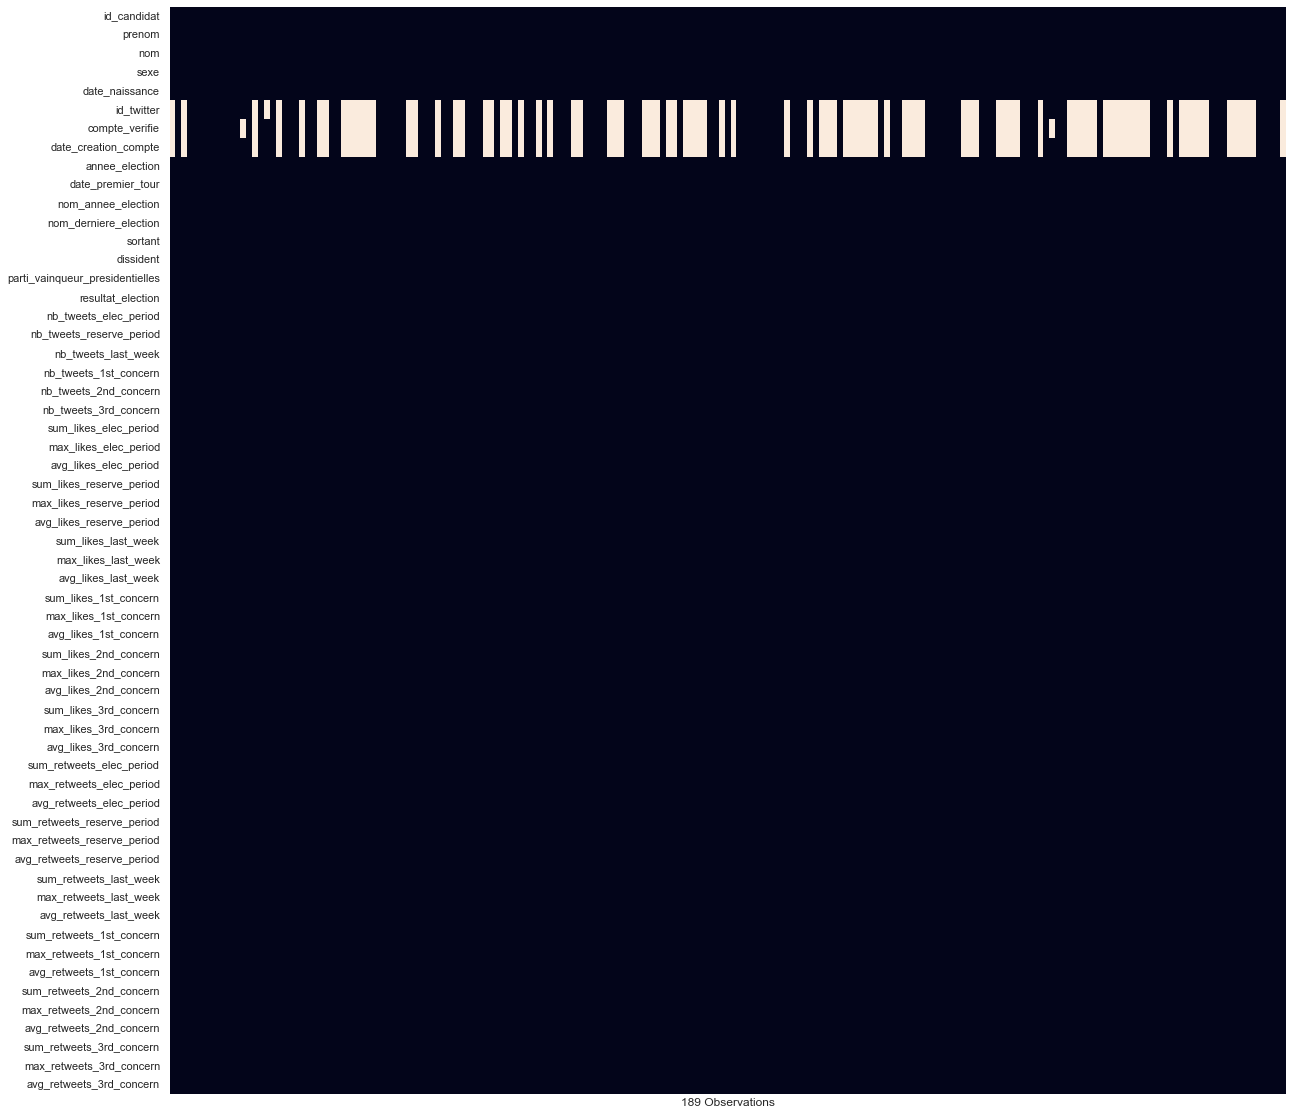

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull().sort_index().T, cbar=False, xticklabels=False)
plt.xlabel(f"{len(df)} Observations")
plt.show()

## Préparation du Dataset

### Suppression des variables non pertinentes

In [13]:
df.drop([
    "prenom",
    "nom",
    "id_candidat",
    "compte_verifie"
],
axis=1,
inplace=True
)

### Constitution des jeux d'entraînement et de test

In [14]:
# Entraînement sur les candidats aux élections législatives précédentes
df_train = df[df["annee_election"]!=2022].copy()
df_train.drop(labels=["annee_election"], axis=1, inplace=True)

# Test sur les candidats aux élections législatives de 2022
df_test = df[df["annee_election"]==2022].copy()
df_test.drop(labels=["annee_election"], axis=1, inplace=True)

# Séparation des variables et de la colonne cible pour chaque jeu
X_train = df_train[df_train.columns.difference(["resultat_election"])]
y_train = df_train["resultat_election"]
X_test = df_test[df_test.columns.difference(["resultat_election"])]
y_test = df_test["resultat_election"]

In [15]:
# Reset des index
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [16]:
def y_details(y_train, y_test):
    y_train_vc = y_train.value_counts().values
    y_test_vc = y_test.value_counts().values
    y_vc = np.stack((y_train_vc, y_test_vc), axis=0)
    y_details = pd.DataFrame(data=y_vc, index=["Train", "Test"], columns=["0", "1"])
    y_details["Total"] = y_details["0"] + y_details["1"]
    return y_details

In [17]:
y_details(y_train, y_test)

,0,1,Total
Train,148,8,156
Test,29,4,33


### Traitement des valeurs manquantes

#### Valeurs manquantes dans le jeu d'entraînement

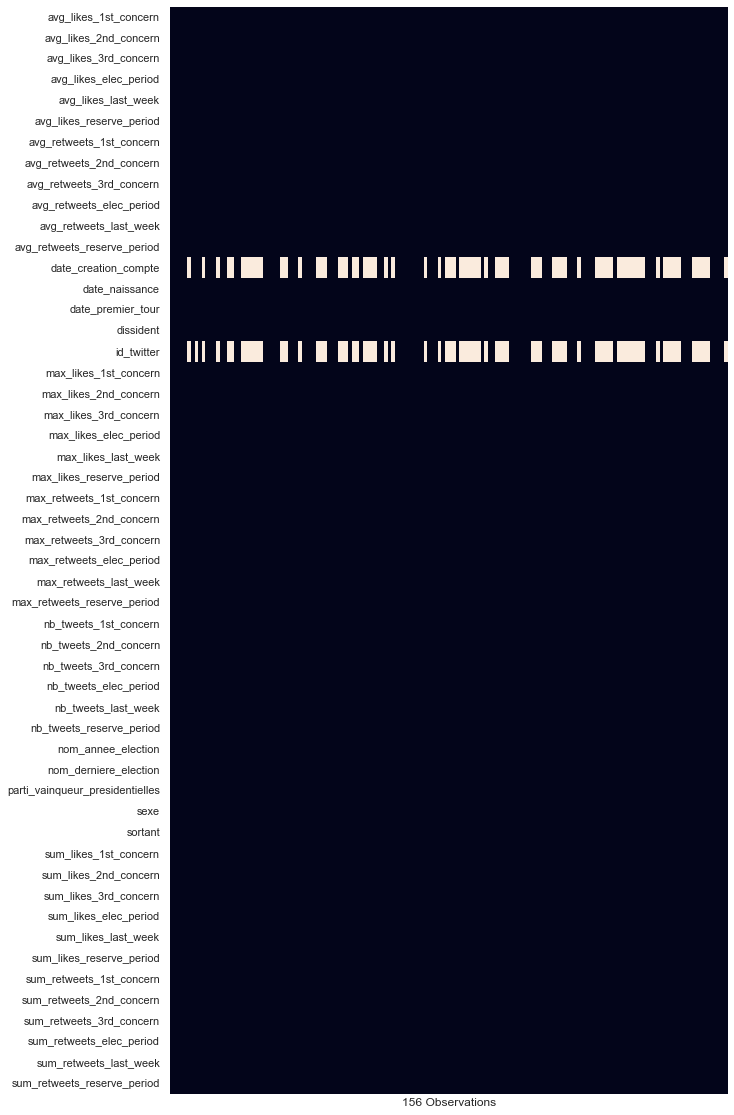

In [18]:
plt.figure(figsize=(10, 20))
sns.heatmap(X_train.isnull().sort_index().T, cbar=False, xticklabels=False)
plt.xlabel(f"{len(X_train)} Observations")
plt.show()

#### Valeurs manquantes dans le jeu de test

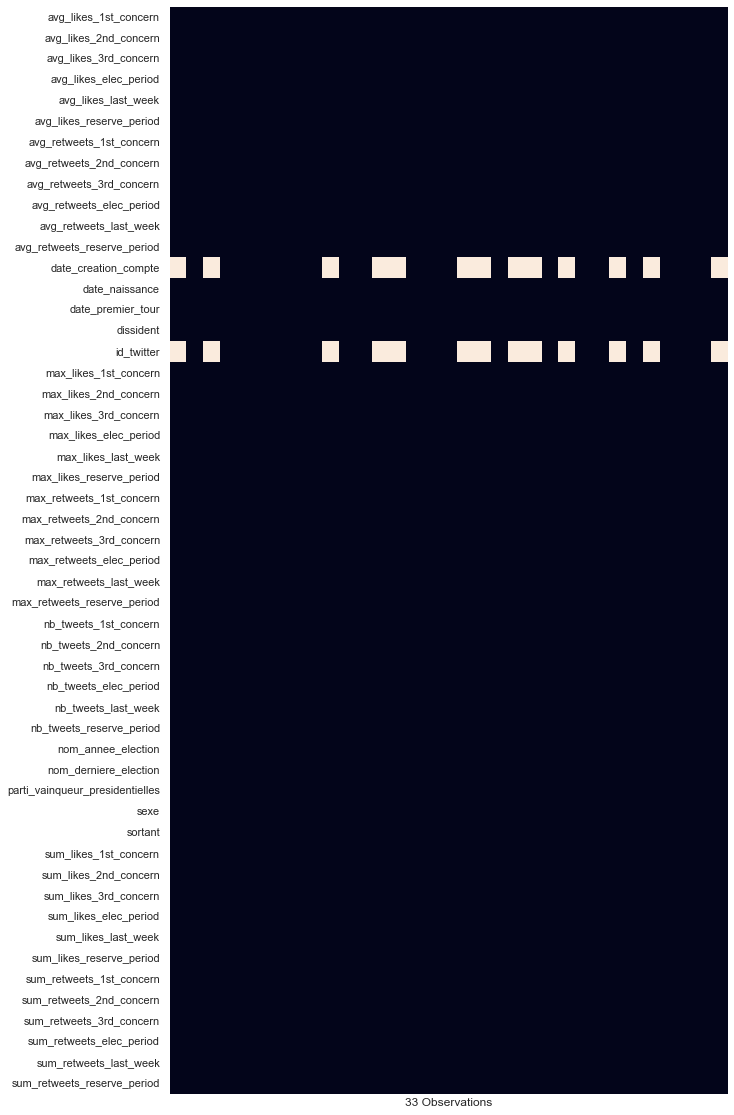

In [19]:
plt.figure(figsize=(10, 20))
sns.heatmap(X_test.isnull().sort_index().T, cbar=False, xticklabels=False)
plt.xlabel(f"{len(X_test)} Observations")
plt.show()

### Feature engineering

#### Création d'une colonne `âge`

In [20]:
today = date.today()

# Jeu d'entraînement
X_train["age"] = X_train["date_naissance"].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
X_train.drop(labels=["date_naissance"], axis=1, inplace=True)

# Jeu de test
X_test["age"] = X_test["date_naissance"].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
X_test.drop(labels=["date_naissance"], axis=1, inplace=True)

#### Création d'une colonne `compte_twitter` booléenne

In [21]:
# Jeu d'entraînement
X_train["compte_twitter"] = X_train["id_twitter"].isna()
X_train.drop(labels=["id_twitter"], axis=1, inplace=True)

# Jeu de test
X_test["compte_twitter"] = X_test["id_twitter"].isna()
X_test.drop(labels=["id_twitter"], axis=1, inplace=True)

#### Création d'une colonne `xp_twitter`

In [22]:
# Jeu d'entraînement
X_train["xp_twitter"] = X_train["date_premier_tour"] - X_train["date_creation_compte"]
X_train["xp_twitter"] = X_train["xp_twitter"].dt.days
X_train["xp_twitter"] = X_train["xp_twitter"].apply(lambda x: 0 if x < 0 or pd.isna(x) else x)
X_train.drop(labels=["date_premier_tour", "date_creation_compte"], axis=1, inplace=True)

# Jeu de test
X_test["xp_twitter"] = X_test["date_premier_tour"] - X_test["date_creation_compte"]
X_test["xp_twitter"] = X_test["xp_twitter"].dt.days
X_test["xp_twitter"] = X_test["xp_twitter"].apply(lambda x: 0 if x < 0 or pd.isna(x) else x)
X_test.drop(labels=["date_premier_tour", "date_creation_compte"], axis=1, inplace=True)

### Conversion des types des colonnes

In [23]:
# Jeu d'entraînement
X_train.loc[:, X_train.dtypes=="object"] = X_train.select_dtypes(['object']).apply(lambda x: x.astype('category'))
y_train = y_train.astype('int')

# Jeu de test
X_test.loc[:, X_test.dtypes=="object"] = X_test.select_dtypes(['object']).apply(lambda x: x.astype('category'))
y_test = y_test.astype('int')

### Création du preprocessor

In [24]:
# Opérations de transformation pour les variables catégorielles
categorical_transformer = OneHotEncoder(handle_unknown="ignore", drop="first")

# Variables catégorielles
categorical_features = X_train.select_dtypes(["category"]).columns

# Instantiation du pré-processeur
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="passthrough"
)

### Vérification des jeux finaux

In [25]:
# Vérification de la sortie du preprocessor pour le jeu d'entraînement
features = preprocessor.fit(X_train).get_feature_names_out()
features = [feature.split("__")[1] for feature in features]
pd.DataFrame(preprocessor.transform(X_train), columns=features).head(5)

ValueError: `handle_unknown` must be 'error' when the drop parameter is specified, as both would create categories that are all zero.

In [26]:
pd.DataFrame(preprocessor.transform(X_train), columns=features).info()

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [187]:
# Vérification de la sortie du preprocessor pour le jeu de test
#features = preprocessor.fit(X_test).get_feature_names_out()
#features = [feature.split("__")[1] for feature in features]
pd.DataFrame(preprocessor.transform(X_test), columns=features).head(5)

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,nom_annee_election_CEN,nom_annee_election_COM,nom_annee_election_DIV,nom_annee_election_DLF,nom_annee_election_DVD,nom_annee_election_DVG,nom_annee_election_ECO,nom_annee_election_EXD,nom_annee_election_EXG,nom_annee_election_FG,nom_annee_election_FI,nom_annee_election_FN,nom_annee_election_LR,nom_annee_election_MDM,nom_annee_election_NCE,nom_annee_election_PRV,nom_annee_election_RDG,nom_annee_election_REM,nom_annee_election_SOC,nom_annee_election_UDI,nom_annee_election_UMP,nom_annee_election_VEC,nom_derniere_election_DSV,nom_derniere_election_DVD,nom_derniere_election_DVG,nom_derniere_election_DXD,nom_derniere_election_DXG,nom_derniere_election_ECO,nom_derniere_election_ENS,nom_derniere_election_LR,nom_derniere_election_MDM,nom_derniere_election_NCE,nom_derniere_election_NUPES,nom_derniere_election_PRV,nom_derniere_election_RDG,nom_derniere_election_RN,nom_derniere_election_UDI,parti_vainqueur_presidentielles_PS,sexe_M,avg_likes_1st_concern,avg_likes_2nd_concern,avg_likes_3rd_concern,avg_likes_elec_period,avg_likes_last_week,avg_likes_reserve_period,avg_retweets_1st_concern,avg_retweets_2nd_concern,avg_retweets_3rd_concern,avg_retweets_elec_period,avg_retweets_last_week,avg_retweets_reserve_period,dissident,max_likes_1st_concern,max_likes_2nd_concern,max_likes_3rd_concern,max_likes_elec_period,max_likes_last_week,max_likes_reserve_period,max_retweets_1st_concern,max_retweets_2nd_concern,max_retweets_3rd_concern,max_retweets_elec_period,max_retweets_last_week,max_retweets_reserve_period,nb_tweets_1st_concern,nb_tweets_2nd_concern,nb_tweets_3rd_concern,nb_tweets_elec_period,nb_tweets_last_week,nb_tweets_reserve_period,sortant,sum_likes_1st_concern,sum_likes_2nd_concern,sum_likes_3rd_concern,sum_likes_elec_period,sum_likes_last_week,sum_likes_reserve_period,sum_retweets_1st_concern,sum_retweets_2nd_concern,sum_retweets_3rd_concern,sum_retweets_elec_period,sum_retweets_last_week,sum_retweets_reserve_period,age,compte_twitter,xp_twitter
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,48,True,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,63,False,1138.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,44,True,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,44.0,0.0,7.0,28.0,24.0,26.0,27.0,0.0,0.0,157.0,93.0,225.0,False,44.0,0.0,7.0,291.0,55.0,291.0,27.0,0.0,0.0,8223.0,962.0,8223.0,1,0,1,68,17,46,False,44,0,7,1910,405,1186,27,0,0,10679,1574,10352,41,False,924.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,77.0,0.0,27.0,15.0,26.0,15.0,37.0,0.0,52.0,36.0,67.0,True,27.0,101.0,0.0,1809.0,216.0,1809.0,15.0,43.0,0.0,6671.0,1306.0,6671.0,1,2,0,466,115,274,True,27,153,0,12458,1749,7103,15,73,0,24056,4103,18437,35,False,3510.0


In [188]:
pd.DataFrame(preprocessor.transform(X_test), columns=features).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 86 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   nom_annee_election_CEN              33 non-null     object
 1   nom_annee_election_COM              33 non-null     object
 2   nom_annee_election_DIV              33 non-null     object
 3   nom_annee_election_DLF              33 non-null     object
 4   nom_annee_election_DVD              33 non-null     object
 5   nom_annee_election_DVG              33 non-null     object
 6   nom_annee_election_ECO              33 non-null     object
 7   nom_annee_election_EXD              33 non-null     object
 8   nom_annee_election_EXG              33 non-null     object
 9   nom_annee_election_FG               33 non-null     object
 10  nom_annee_election_FI               33 non-null     object
 11  nom_annee_election_FN               33 non-null     object
 

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Modélisation

### Définition des métriques

In [27]:
def classification_metrics(y, y_pred):
    return pd.DataFrame(
        {
            "accuracy_score": metrics.accuracy_score(y_true=y, y_pred=y_pred),
            "f1_score": metrics.f1_score(y_true=y, y_pred=y_pred),
            "precision_score": metrics.precision_score(
                y_true=y, y_pred=y_pred),
            "recall_score": metrics.recall_score(y_true=y, y_pred=y_pred)
        },
        index=[0])

### Decision Tree

In [36]:
dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier()),
])

In [37]:
dt_params_grid = {
    "model__splitter": ["best", "random"],
    "model__max_depth": [2, 3, 5, 10, 15, 20, 30],
    "model__min_samples_split": [5, 10, 20, 30, 40],
    "model__min_samples_leaf": [1, 2, 5, 10],
    "model__max_features": ["auto", "sqrt", "log2"],
    "model__class_weight": ["balanced"]
}

pp.pprint(dt_params_grid)

total_conf = 1
for _, value in dt_params_grid.items():
    if isinstance(value, list):
        total_conf *= len(value)

print("\n")
print(f"Nombre de configurations à tester : {total_conf}")

{   'model__class_weight': ['balanced'],
    'model__max_depth': [2, 3, 5, 10, 15, 20, 30],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__min_samples_leaf': [1, 2, 5, 10],
    'model__min_samples_split': [5, 10, 20, 30, 40],
    'model__splitter': ['best', 'random']}


Nombre de configurations à tester : 840


In [39]:
dt_grid_search = GridSearchCV(
                                    estimator=dt_pipeline, 
                                    param_grid=dt_params_grid,
                                    cv=5,
                                    scoring="accuracy",
                                    verbose=1,
                                    n_jobs=6
                                )

dt_grid_search.fit(X_train, y_train)
print(f"Best score: {round(dt_grid_search.best_score_, 2)}")
pp.pprint(dt_grid_search.best_params_)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


C:\Users\evaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan 

ValueError: `handle_unknown` must be 'error' when the drop parameter is specified, as both would create categories that are all zero.

In [193]:
pred_train = dt_grid_search.predict(X_train)
pred_test = dt_grid_search.predict(X_test)

print("Classification metrics for train data")
print(classification_metrics(y_train, pred_train))
print("\n")
print("Classification metrics for test data")
print(classification_metrics(y_test, pred_test))

Classification metrics for train data
   accuracy_score  f1_score  precision_score  recall_score
0        0.544872  0.183908         0.101266           1.0


Classification metrics for test data
   accuracy_score  f1_score  precision_score  recall_score
0        0.454545      0.25             0.15          0.75


/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


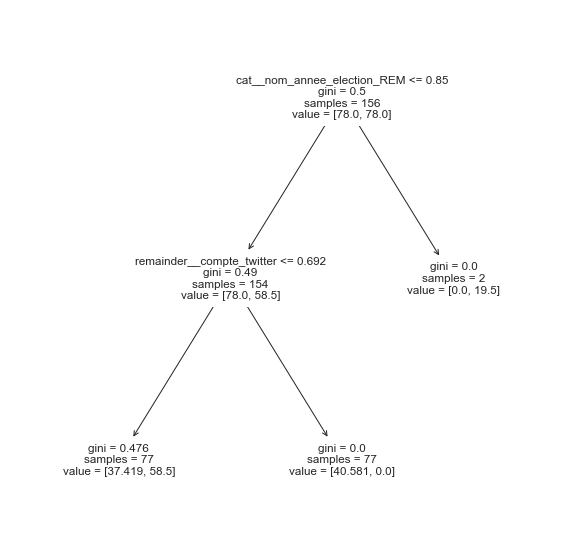

In [194]:
feature_names = dt_grid_search.best_estimator_.named_steps["preprocessor"].get_feature_names_out().tolist()

fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(dt_grid_search.best_estimator_["model"], feature_names=feature_names, ax=ax)
plt.show()

### RandomForestClassifier

In [28]:
dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier()),
])


In [30]:
dt_params_grid = {"n_estimators": [10, 100, 200, 300, 400], "max_features": [2, 3, 5, 7, 9], "min_samples_split": [2, 4, 6, 8],"max_features": [5, 10, 15, 20], "bootstrap":[False]}
pp.pprint(dt_params_grid)

total_conf = 1
for _, value in dt_params_grid.items():
    if isinstance(value, list):
        total_conf *= len(value)

print("\n")
print(f"Nombre de configurations à tester : {total_conf}")

{   'bootstrap': [False],
    'max_features': [5, 10, 15, 20],
    'min_samples_split': [2, 4, 6, 8],
    'n_estimators': [10, 100, 200, 300, 400]}


Nombre de configurations à tester : 80


In [31]:
dt_grid_search = GridSearchCV(
                                    estimator=dt_pipeline, 
                                    param_grid=dt_params_grid,
                                    cv=5,
                                    scoring="accuracy",
                                    verbose=1,
                                    n_jobs=6
                                )

dt_grid_search.fit(X_train, y_train)
print(f"Best score: {round(dt_grid_search.best_score_, 2)}")
pp.pprint(dt_grid_search.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


ValueError: Invalid parameter bootstrap for estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['nom_annee_election', 'nom_derniere_election',
       'parti_vainqueur_presidentielles', 'sexe'],
      dtype='object'))])),
                ('model', RandomForestClassifier())]). Check the list of available parameters with `estimator.get_params().keys()`.

In [35]:
estimator.get_params().keys()

NameError: name 'estimator' is not defined